In [1]:
import pandas as pd
import math
import time
%matplotlib inline
import numpy as np
import pytz
from pytz import timezone
from pygeocoder import Geocoder
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
df1 = pd.read_table('data/final_op.txt', index_col=None)
df1.head()

df1['Is_Traffic_Related'] = df1['Is_Traffic_Related'].map({'t': 1, 'f': 0})
#df1['county'] = df1['county'].map({'Staten Island': 1, 'Bronx': 2, 'Queens': 3, 'Brooklyn': 4, 'Manhattan': 5})

df1

,tweet_id,tweet_text,tweet_coordinates,lat_origin,long_origin,uber_estimate,zip_code,eastern_time,hours,weekday,day_hour,Is_Traffic_Related,County,Neighbourhood,Neighbourhood_code,Is_weekend
0,8.324278e+17,Yeezus gospel #tbt @ Madison Square Garden htt...,"[40.75079924, -73.99297235]",40.750799,-73.992972,70,10001,2017-02-16 22:13:36-05,22,3,94,0,New York,Chelsea and Clinton,8,0
1,8.324278e+17,"GNW! @ New York, New York https://t.co/Sqpnij3q4k","[40.7142, -74.0064]",40.714200,-74.006400,79,10007,2017-02-16 22:13:40-05,22,3,94,0,Manhattan,Lower Manhattan,20,0
2,8.324278e+17,Soulful Southern blues bass #guitar by @thatab...,"[40.7471587, -73.99463981]",40.747159,-73.994640,73,10001,2017-02-16 22:13:45-05,22,3,94,0,New York,Chelsea and Clinton,8,0
3,8.324278e+17,Construction on #I678 SB at Queens; Bronx Coun...,"[40.802501, -73.830001]",40.802501,-73.830001,37,11357,2017-02-16 22:13:55-05,22,3,94,1,Queens,North Queens,22,0
4,8.324278e+17,Construction on #I678 SB at Queens; Bronx Coun...,"[40.802501, -73.830001]",40.802501,-73.830001,37,11357,2017-02-16 22:13:55-05,22,3,94,1,Queens,North Queens,22,0
5,8.324279e+17,"A little #yoga to end my little"" day :) #takin...","[40.70551135, -73.9249169]",40.705511,-73.924917,78,11237,2017-02-16 22:14:04-05,22,3,94,0,Brooklyn,Bushwick and Williamsburg,2,0
6,8.324279e+17,It ain't pretty but it is what it is. #bowling...,"[40.72196325, -73.95753998]",40.721963,-73.957540,84,11249,2017-02-16 22:14:05-05,22,3,94,0,Brooklyn,Central Brooklyn,5,0
7,8.324279e+17,dianymota for @UptownFashionNY fashiondesigner...,"[40.76436935, -73.99237252]",40.764369,-73.992373,81,10019,2017-02-16 22:14:08-05,22,3,94,0,Manhattan,Chelsea and Clinton,8,0
8,8.324279e+17,Just posted a photo @ Baby's All Right https:/...,"[40.71012, -73.96348]",40.710120,-73.963480,72,11211,2017-02-16 22:14:13-05,22,3,94,0,Brooklyn,Greenpoint,13,0
9,8.324279e+17,The mind can be paradise or a prison...\n\nSom...,"[40.7142, -74.0064]",40.714200,-74.006400,79,10007,2017-02-16 22:14:22-05,22,3,94,0,Manhattan,Lower Manhattan,20,0


In [14]:


df2=df1.groupby('Is_Traffic_Related').size()
df2
df3 = df1[(df1.uber_estimate>=45) & (df1.uber_estimate<=90)]

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df3[['day_hour','Is_weekend','Is_Traffic_Related','Neighbourhood_code']], df3.uber_estimate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
msePRC = np.mean((df3.uber_estimate - lm.predict(df3[['day_hour','Is_weekend','Is_Traffic_Related','Neighbourhood_code']])) ** 2)
print (msePRC)
print (lm.coef_)

81.54896793650954
[ 0.01617373 -2.00987455 -3.30466165  0.12990113]


In [18]:
ESS = np.sum(lm.predict(df3[['day_hour','Is_weekend','Is_Traffic_Related','Neighbourhood_code']]) - np.mean(df3.uber_estimate)) ** 2
RSS = np.sum((df3.uber_estimate - lm.predict(df3[['day_hour','Is_weekend','Is_Traffic_Related','Neighbourhood_code']])) ** 2)
R2 = ESS/(ESS+RSS)
#R2=0.00001
print (R2)

2.40157387153e-27


In [19]:
Y = lm.predict(df3[['day_hour','Is_weekend','Is_Traffic_Related','Neighbourhood_code']])

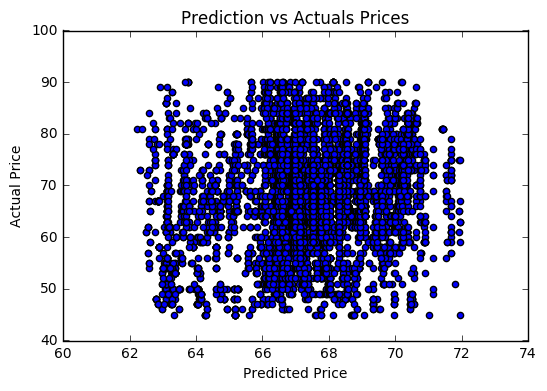

In [21]:
plt.scatter(Y, df3.uber_estimate)
plt.title("Prediction vs Actuals Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")